In [1]:
from spriteworld import environment, renderers, sprite, tasks, action_spaces
import matplotlib.pyplot as plt, copy, numpy as np
%matplotlib inline

In [2]:
s1 = sprite.Sprite(0.25, 0.25, 'triangle', c0=140,c1=220, c2=80, goal_x=0.1, goal_y=0.1)
s2 = sprite.Sprite(0.75, 0.25, 'square', c0=200,c2=255, goal_x=0.9, goal_y=0.1)
s3 = sprite.Sprite(0.25, 0.75, 'circle', c2=255, c1=210, goal_x=0.1, goal_y=0.9)
s4 = sprite.Sprite(0.50, 0.75, 'star_5', c0=255, c1=80)

s4_goal = sprite.Sprite(0.20, 0.20, 'pentagon', c2=250, c1=180)

init_sprites = lambda: copy.deepcopy((s1, s2, s3, s4))

In [3]:
GOAL_ENV_IMAGE_RENDERERS = {
  'observation': renderers.PILRenderer((64,64)),
  'achieved_goal': renderers.AchievedGoalRenderer(),
  'desired_goal': renderers.PILGoalRenderer((64, 64))
}

GOAL_ENV_VECTOR_RENDERERS = {
  'observation': renderers.VectorizedPositions(),
  'achieved_goal': renderers.AchievedGoalRenderer(),
  'desired_goal': renderers.VectorizedGoalPositions()
}

In [4]:
env = environment.Environment(tasks.NoReward(), 
                              action_spaces.Navigate(), 
                              GOAL_ENV_VECTOR_RENDERERS,
                              init_sprites)

In [8]:
t = env.reset()
t.observation

{'observation': array([0.25, 0.25, 0.75, 0.25, 0.25, 0.75, 0.5 , 0.75]),
 'achieved_goal': array([0.25, 0.25, 0.75, 0.25, 0.25, 0.75, 0.5 , 0.75]),
 'desired_goal': array([0.1, 0.1, 0.9, 0.1, 0.1, 0.9, 0.5, 0.5])}

In [6]:
env = environment.Environment(tasks.NoReward(), 
                              action_spaces.Navigate(), 
                              GOAL_ENV_IMAGE_RENDERERS,
                              init_sprites)

In [7]:
t = env.reset()
list(t.observation.keys())

['observation', 'achieved_goal', 'desired_goal']

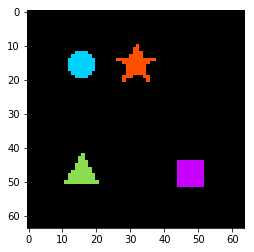

In [8]:
plt.imshow(t.observation['observation'])

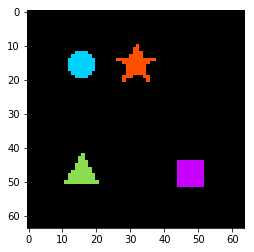

In [9]:
plt.imshow(t.observation['achieved_goal'])

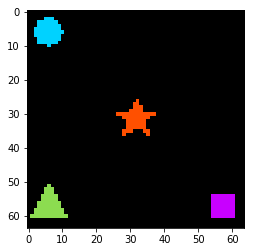

In [10]:
plt.imshow(t.observation['desired_goal'])

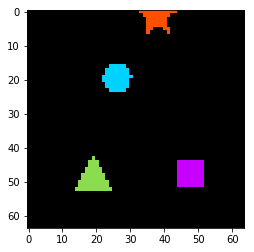

In [12]:
for i in range(1000):
  t = env.step(env.action_space.sample())
plt.imshow(t.observation['observation'])